<a href="https://colab.research.google.com/github/LeeDongN/Medica_AI2/blob/main/ML_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
!pip install matplotlib==3.1.1 scikit-learn==0.23.1 xgboost==1.3.3 PDPbox==0.2.1
from xgboost import plot_tree
import os
import sklearn
from google.colab import drive
from scipy.signal import find_peaks
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

drive.mount('/content/drive')
path = '/content/drive/My Drive/data/'
data = np.load("/content/drive/MyDrive/extracted_data/new_data_5.npy")
label = np.load("/content/drive/MyDrive/extracted_data/new_label_5.npy")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4])

# data analays

In [ ]:
label_count = np.count_nonzero(label == 4)
print(len(label))
print(label_count)
print(label_count/len(label)*100)

251
144
57.37051792828686


# XGboost

In [2]:
#train 변수 나누기
X_train, X_test, y_train, y_test= train_test_split(data, label,test_size=0.3, random_state=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=20, seed=123)
xg_cl.fit(X_train, y_train)
#예측하기
preds = xg_cl.predict(X_test)
#정확도
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.921053


# checking the accuracy of each label

## before oversampling

In [3]:
from sklearn.metrics import confusion_matrix

# Evaluate the KNN classifier
accuracy = xg_cl.score(X_test, y_test)

# Predict labels for the test set
y_pred = xg_cl.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"-----------------------------------Accuracy before Oversampling-----------------------------------")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

for i, acc in enumerate(class_accuracy):
    print(f"Accuracy for class {i}: {acc:.2f}")

-----------------------------------Accuracy before Oversampling-----------------------------------
Accuracy: 0.9210526315789473
Confusion Matrix:
[[ 1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  1 17  2  1]
 [ 0  0  2  2  0]
 [ 0  0  0  0 48]]
Accuracy for class 0: 1.00
Accuracy for class 1: 1.00
Accuracy for class 2: 0.81
Accuracy for class 3: 0.50
Accuracy for class 4: 1.00


## after oversampling

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Apply SMOTE oversampling
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_train, y_train)

# Train the KNN classifier with SMOTE oversampled data
xg_cl.fit(X_resampled_smote, y_resampled_smote)

# Evaluate the KNN classifier with SMOTE oversampled data
y_pred_smote = xg_cl.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Overall Accuracy with SMOTE:", accuracy_smote)

# Display class distribution after SMOTE oversampling
print("Class distribution after SMOTE:", sorted(Counter(y_resampled_smote).items()))

# Calculate accuracy for each class with SMOTE oversampled data
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_accuracy_smote = conf_matrix_smote.diagonal() / conf_matrix_smote.sum(axis=1)
print("Accuracy for each class with SMOTE oversampling:")
for i, acc in enumerate(class_accuracy_smote):
    print(f"Class {i}: {acc:.2f}")

# Calculate the confusion matrix with SMOTE oversampled data

print("Confusion Matrix with SMOTE:")
print(conf_matrix_smote)

Overall Accuracy with SMOTE: 0.9210526315789473
Class distribution after SMOTE: [(0, 96), (1, 96), (2, 96), (3, 96), (4, 96)]
Accuracy for each class with SMOTE oversampling:
Class 0: 1.00
Class 1: 1.00
Class 2: 0.76
Class 3: 0.75
Class 4: 1.00
Confusion Matrix with SMOTE:
[[ 1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  3 16  1  1]
 [ 0  0  1  3  0]
 [ 0  0  0  0 48]]


# Analyse

## parameters weight

Feature Importances:
[0.002 0.009 0.002 0.023 0.    0.005 0.    0.051 0.001 0.002 0.013 0.003
 0.004 0.001 0.006 0.004 0.018 0.    0.023 0.047 0.025 0.001 0.04  0.003
 0.008 0.075 0.    0.067 0.    0.005 0.001 0.    0.099 0.034 0.    0.104
 0.092 0.005 0.004 0.003 0.042 0.024 0.001 0.015 0.001 0.014 0.052 0.04
 0.    0.027]

1: 0.002
2: 0.009
3: 0.002
4: 0.023
5: 0.000
6: 0.005
7: 0.000
8: 0.051
9: 0.001
10: 0.002
11: 0.013
12: 0.003
13: 0.004
14: 0.001
15: 0.006
16: 0.004
17: 0.018
18: 0.000
19: 0.023
20: 0.047
21: 0.025
22: 0.001
23: 0.040
24: 0.003
25: 0.008
26: 0.075
27: 0.000
28: 0.067
29: 0.000
30: 0.005
31: 0.001
32: 0.000
33: 0.099
34: 0.034
35: 0.000
36: 0.104
37: 0.092
38: 0.005
39: 0.004
40: 0.003
41: 0.042
42: 0.024
43: 0.001
44: 0.015
45: 0.001
46: 0.014
47: 0.052
48: 0.040
49: 0.000
50: 0.027


<Axes: >

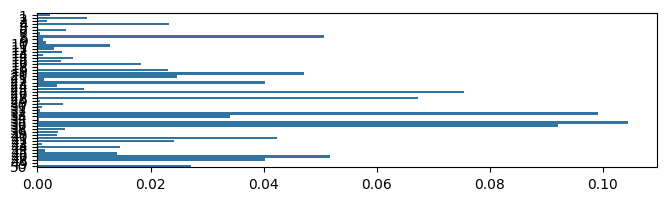

In [5]:
import seaborn as sns
from matplotlib.pylab import rcParams
%matplotlib inline

# making colums name
c_name = [str(i) for i in range(1, 51)]

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(xg_cl.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(c_name, xg_cl.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

rcParams['figure.figsize'] = 8, 2
# feature importance 시각화
sns.barplot(x=xg_cl.feature_importances_, y=c_name)

In [27]:
num = 5
indices = np.argsort(temp)[-num:]

# Get the top 'num' elements
top_elements = temp[indices]

print("Top elements:", top_elements)
print("Indices:", indices)

Top elements: [0.067 0.075 0.092 0.099 0.104]
Indices: [27 25 36 32 35]


## decision tree

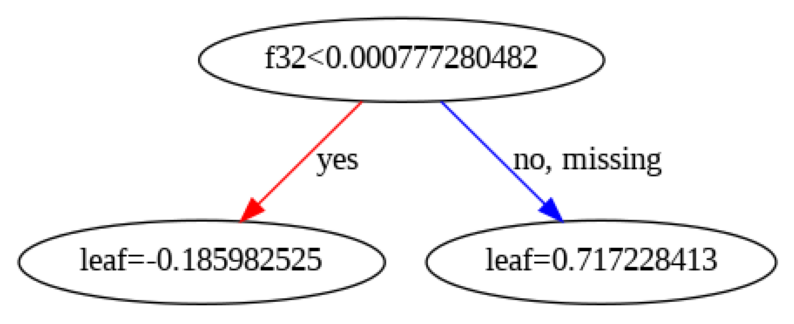

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=0, ax=ax)
plt.show()

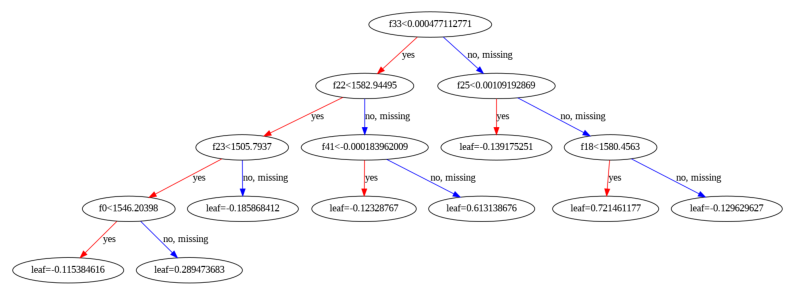

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=1, ax=ax)
plt.show()

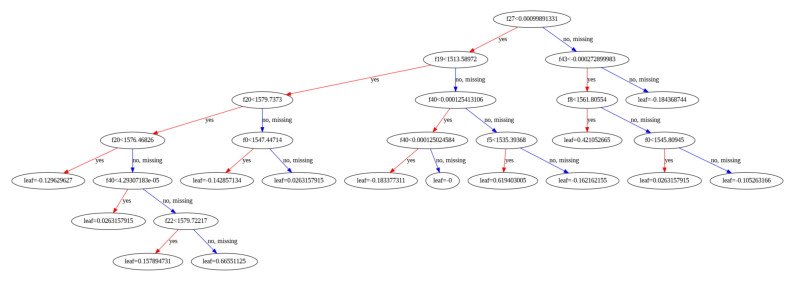

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=2, ax=ax)
plt.show()

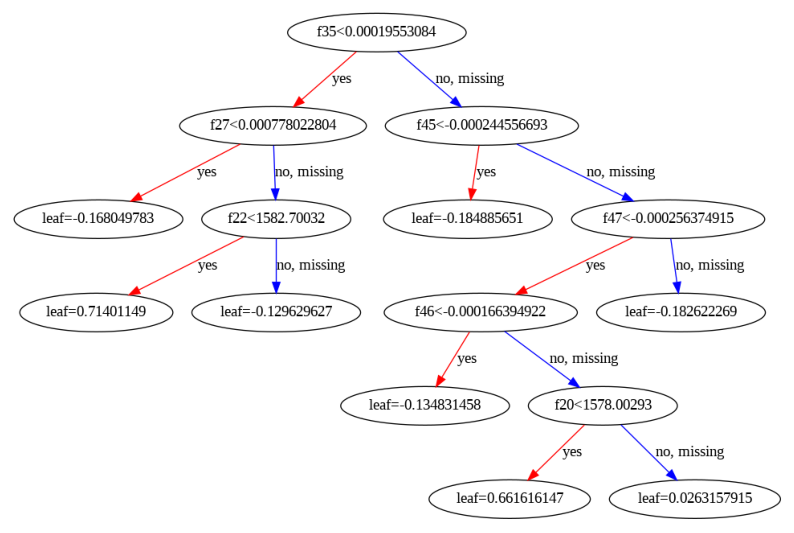

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=3, ax=ax)
plt.show()

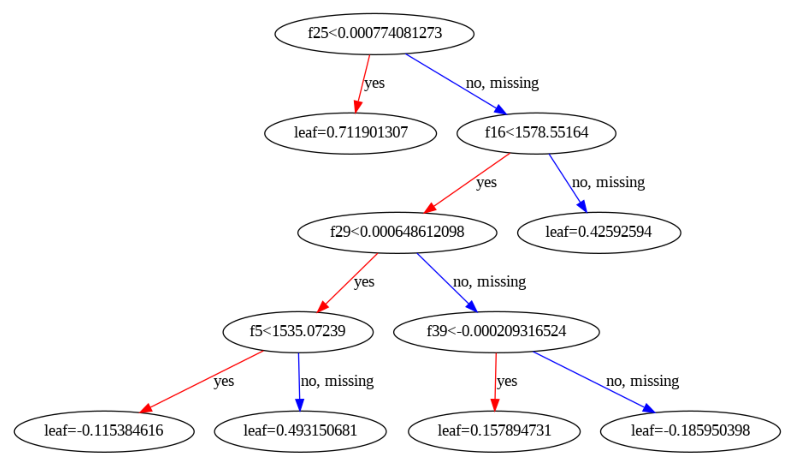

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=4, ax=ax`)
plt.show()

## info plots

In [58]:
# making Dataframe
existing_df = pd.DataFrame(data, columns=c_name)

In [60]:
existing_df['label'] = label

In [61]:
existing_df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,label
0,1545.8135,1539.9405,1548.8690,1536.8254,1551.9246,1533.7698,1555.1190,1530.7738,1558.1349,1528.0159,...,-0.000099,-0.000009,-0.000174,-0.000082,-0.000222,-0.000135,-0.000254,-0.000178,0.000966,2
1,1545.8333,1539.9405,1548.8889,1536.8651,1551.9246,1533.7698,1555.1190,1530.8333,1558.1548,1528.0159,...,-0.000100,-0.000006,-0.000174,-0.000077,-0.000223,-0.000132,-0.000254,-0.000175,0.000970,2
2,1546.0516,1539.9802,1549.1468,1536.9246,1552.2024,1534.0476,1555.1984,1531.1508,1558.3929,1528.0754,...,-0.000107,0.000005,-0.000178,-0.000072,-0.000225,-0.000129,-0.000256,-0.000173,0.000976,2
3,1545.8135,1539.9405,1548.8889,1536.8056,1551.9048,1533.7698,1555.1190,1530.7738,1558.1548,1528.0159,...,-0.000099,-0.000008,-0.000174,-0.000079,-0.000222,-0.000133,-0.000254,-0.000176,0.000966,2
4,1546.0317,1539.9405,1549.0675,1536.8452,1551.9444,1533.7897,1555.1587,1530.8929,1558.1548,1528.0159,...,-0.000102,-0.000005,-0.000176,-0.000076,-0.000223,-0.000132,-0.000255,-0.000175,0.000973,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1545.7937,1540.3175,1548.4524,1537.9960,1551.1706,1534.9603,1553.8690,1532.2421,1556.5873,1529.6032,...,0.000034,0.000019,-0.000045,-0.000041,-0.000096,-0.000072,-0.000132,-0.000103,0.000715,4
247,1546.0714,1538.0159,1550.2976,1534.0278,1554.2063,1530.0992,1558.4127,1526.1111,1562.4802,1522.2817,...,-0.000228,-0.000135,-0.000313,-0.000198,-0.000274,-0.000243,-0.000314,-0.000272,0.001599,4
248,1546.0516,1541.0913,1548.8294,1537.9960,1551.4881,1535.2579,1553.8492,1532.9167,1556.9048,1530.3968,...,-0.000058,0.000034,-0.000102,-0.000031,-0.000145,-0.000089,-0.000183,-0.000132,0.000683,4
249,1545.7937,1540.3175,1548.7103,1537.9960,1551.1508,1534.9405,1553.8492,1532.2817,1556.5873,1530.1190,...,0.000032,0.000021,-0.000045,-0.000039,-0.000103,-0.000094,-0.000134,-0.000127,0.000708,4


In [ ]:
pima_features = Indices

In [70]:
from pdpbox import info_plots
pima_target = existing_df.columns[50]

fig, axes, summary_df = info_plots.actual_plot(
            df = existing_df,
            feature = '32',
            feature_name = '32',
            target = pima_target)

AttributeError: module 'pdpbox.info_plots' has no attribute 'actual_plot'